In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode,iplot
import pandas as pd
%matplotlib inline

In [4]:
#Import Data -- thank data.world for data
df = pd.read_csv('https://query.data.world/s/hz6boyxvcbybd6jlnply3my4drwm5j')

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**This Cell is to Explain the details of all Columns :**

* Ranking -- Game ranking based on the total sales (in millions)
* Name -- Name of the Game
* Platform -- Game Platforms like (Wii, NES, PS4, PC, GB etc)
* Year -- Year of game release
* Genre -- Simply the game genre (sports, racing ... )
* publisher -- name of the publisher
* NA_Sales -- Sales in north america (in millions)
* EU_sales -- Sales in Europe (in millions)
* JP_sales -- Sales in Japan (in millions)
* Other_Sales -- Sales in Other Countries (in millions)
* Global_Sales -- Total sales world wide (in millions)

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From above Dataframe, we conclude that :

* 500 games are ranked based on their sales
* Games released between 1980 to 2020
* Mean/Average sales in all regions are very low compare to the Max ...

In [7]:
print('display the shape of data (rows,columns)')
df.shape

display the shape of data (rows,columns)


(16598, 11)

In [83]:
print('Top 25 rows and sort by "Name" columns')
df.sort_values(by = ['Name']).head(5)

Top 25 rows and sort by "Name" columns


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4754,4756,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
8357,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
7107,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
8602,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
8304,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17


In [85]:
print('Top 5 rows from the dataset')
df.head(5)

Top 5 rows from the dataset


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [86]:
print('Bottom 5 rows from dataset')
df.tail(5)

Bottom 5 rows from dataset


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## To Print all Columns names

In [87]:
print('To print all col names')
for col in df.columns:
    print(col)

To print all col names
Rank
Name
Platform
Year
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


In [88]:
x = df['Name'].unique() #using numpy.ndarray to find all Names but only UNIQUE.
y = df['Genre'].unique()
z = df['Publisher'].unique()

In [89]:
print('Total Games by `Name` count(unique) :',len(x))
print('Total Games by `Genre` count(unique) :',len(y))
print('Total Games by `Publisher` count(unique) :',len(z))

Total Games by `Name` count(unique) : 11493
Total Games by `Genre` count(unique) : 12
Total Games by `Publisher` count(unique) : 579


# Exploratory Analysis and Visualization

Use Matplotlib, Seaborn library to visaulize the data

In [13]:
vg_plot =  df[0:25]
vg_plot

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


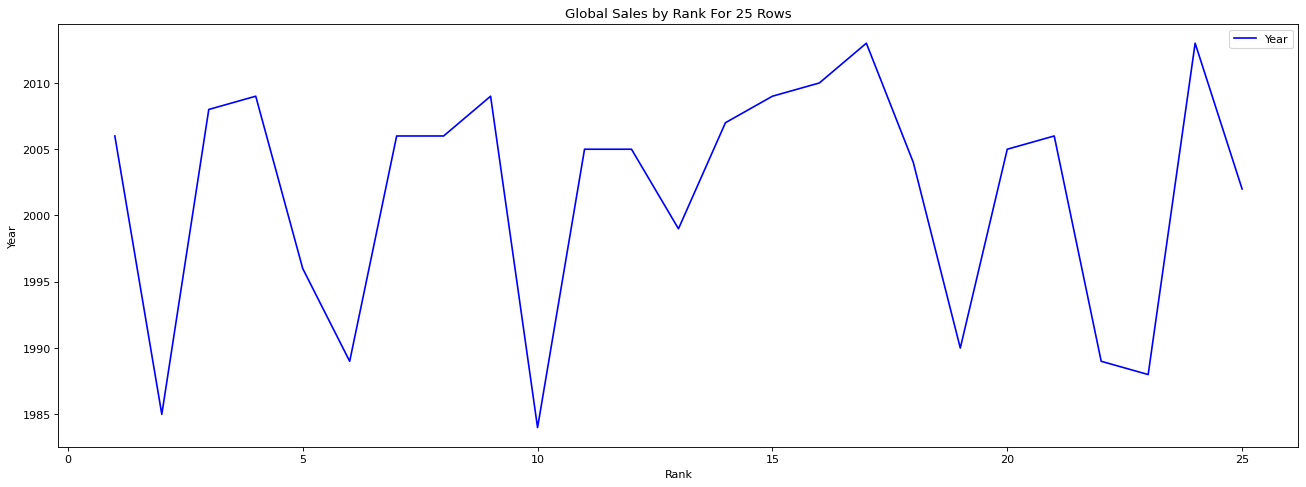

In [14]:
x = vg_plot['Rank']
y = vg_plot['Year']
plt.figure(figsize=(25,8), dpi=80)
plt.plot(x,y, label = 'Year', color = 'blue')
plt.xlabel('Rank')
plt.ylabel('Year')
plt.title('Global Sales by Rank For 25 Rows')
plt.legend()
plt.show()


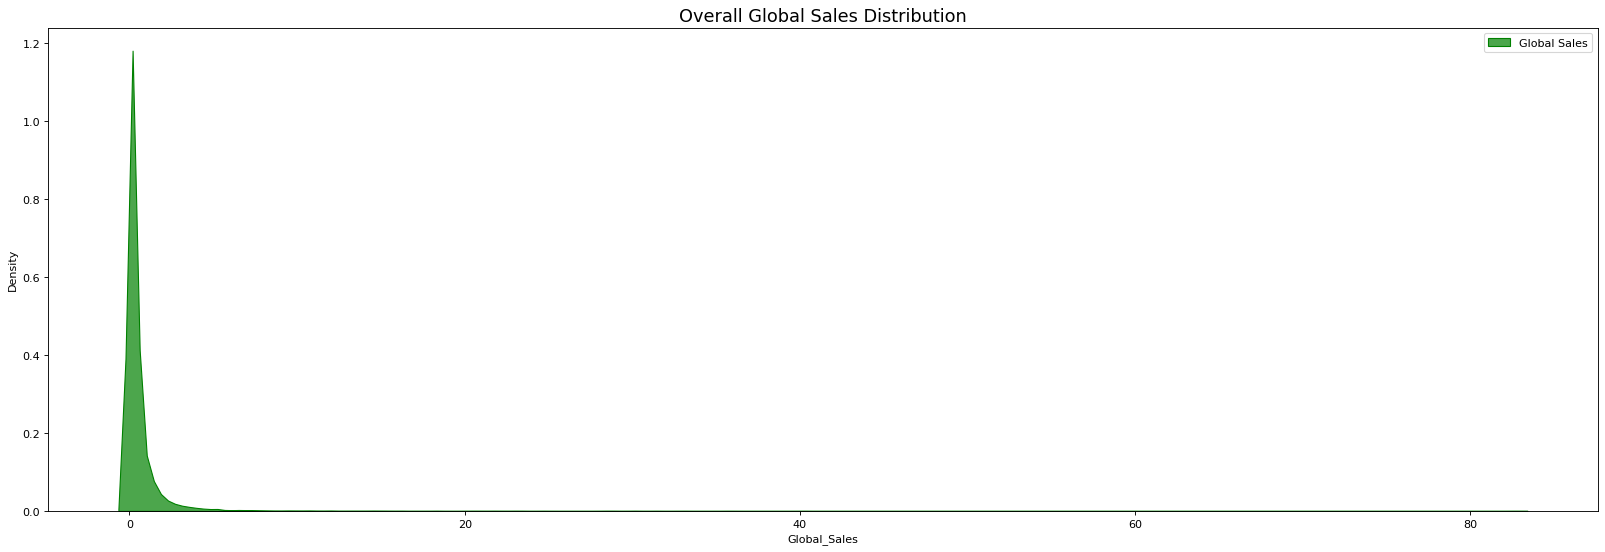

In [25]:
#smooth estimate of the distribution
# Draw Plot
plt.figure(figsize=(25,8), dpi= 80)
sns.kdeplot(df.Global_Sales, shade=True, label = 'Global Sales', color="g", alpha=.7)

# Decoration
plt.title('Overall Global Sales Distribution', fontsize=16)
plt.legend()
plt.show()

In [37]:
total = vg_plot['Global_Sales']
NA = vg_plot['NA_Sales']
EU = vg_plot['EU_Sales']
JP = vg_plot['JP_Sales']
OTHER = vg_plot['Other_Sales']

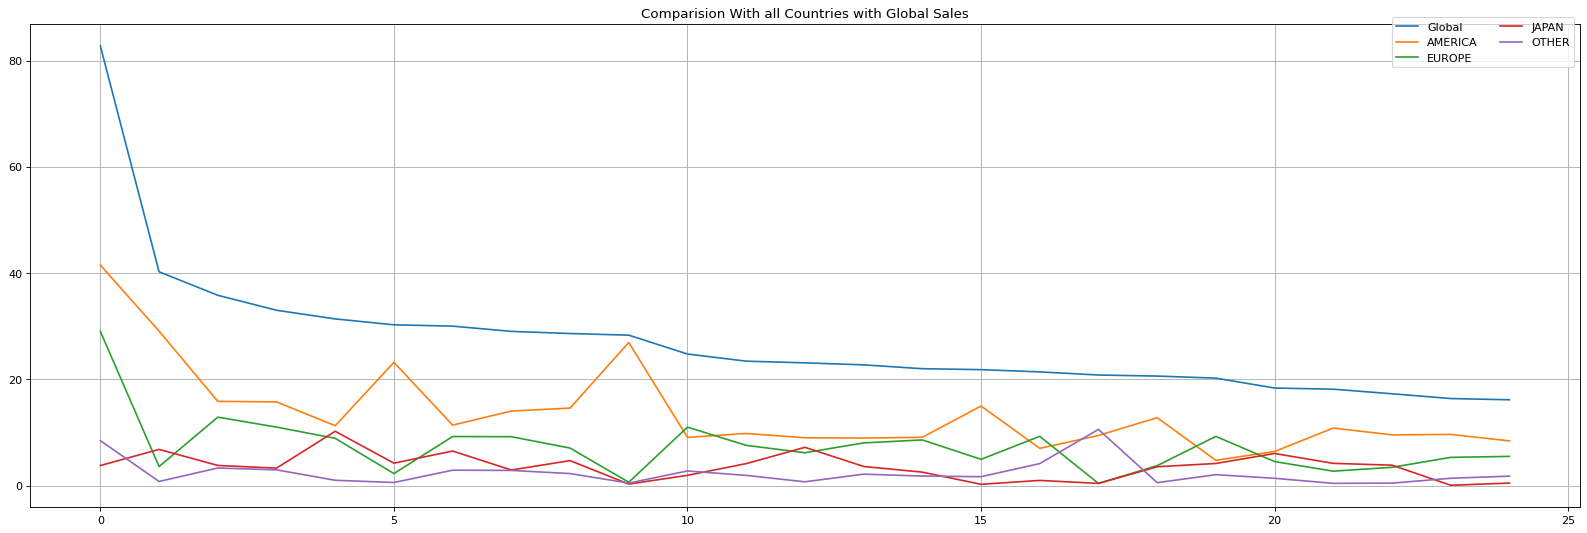

In [38]:
plt.figure(figsize=(25,8), dpi= 80)
plt.grid(True)
plt.title('Comparision With all Countries with Global Sales')

plt.plot(total, label = 'Global')
plt.plot(NA, label = 'AMERICA')
plt.plot(EU, label = 'EUROPE')
plt.plot(JP, label = 'JAPAN')
plt.plot(OTHER, label = 'OTHER')
plt.legend(bbox_to_anchor =(1.0, 1.025), ncol = 2)

Text(0.5, 1.0, 'Stepfield type of Comparision of Global with all Countries')

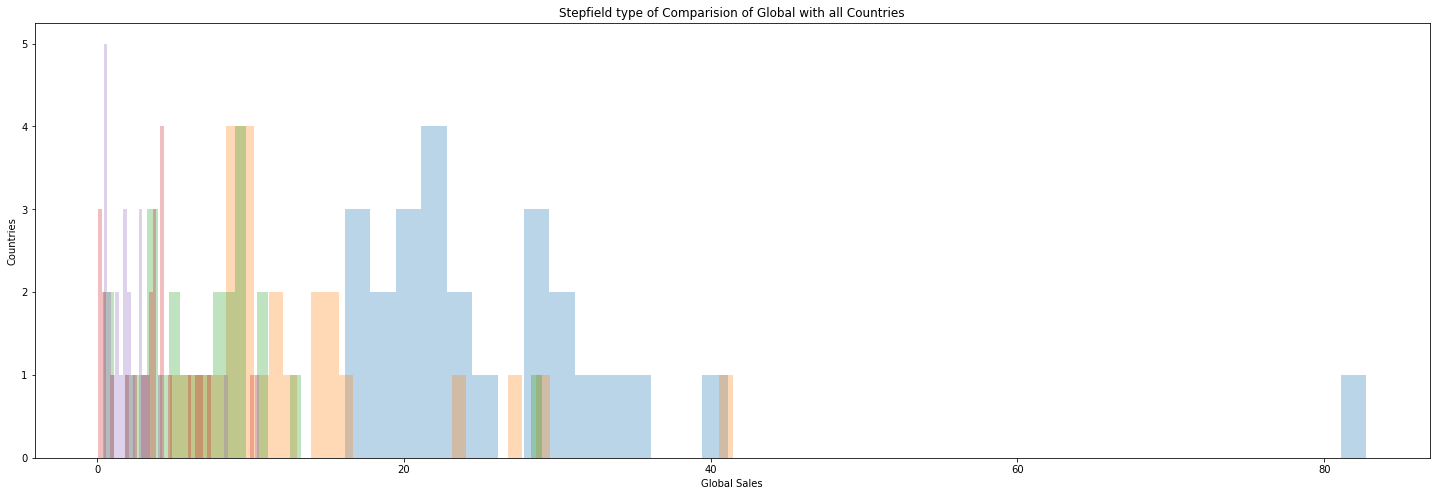

In [39]:
plt.figure(figsize=(25,8))
kwargs = dict(histtype='barstacked', alpha=0.3, bins=40)
plt.hist(total, **kwargs)
plt.hist(NA, **kwargs)
plt.hist(EU, **kwargs)
plt.hist(JP, **kwargs)
plt.hist(OTHER, **kwargs)
plt.xlabel('Global Sales')
plt.ylabel('Countries')
plt.title('Stepfield type of Comparision of Global with all Countries')

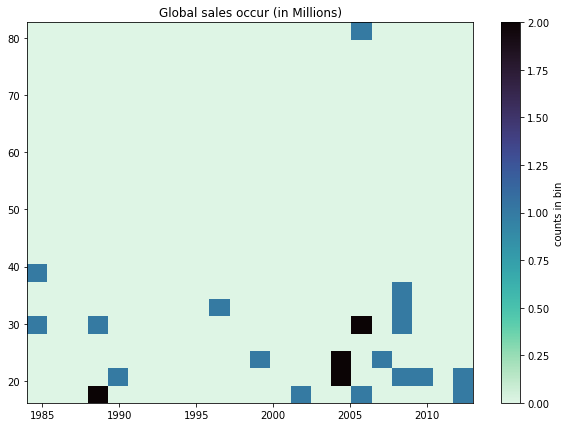

In [104]:
plt.figure(figsize=(10,7))
x = vg_plot['Year']
y = vg_plot['Global_Sales']
plt.title('Global sales occur (in Millions)')
plt.hist2d(x, y, bins=22, cmap='mako_r')
cb = plt.colorbar()
cb.set_label('counts in bin')

## Maximum games sold using Countplot method

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



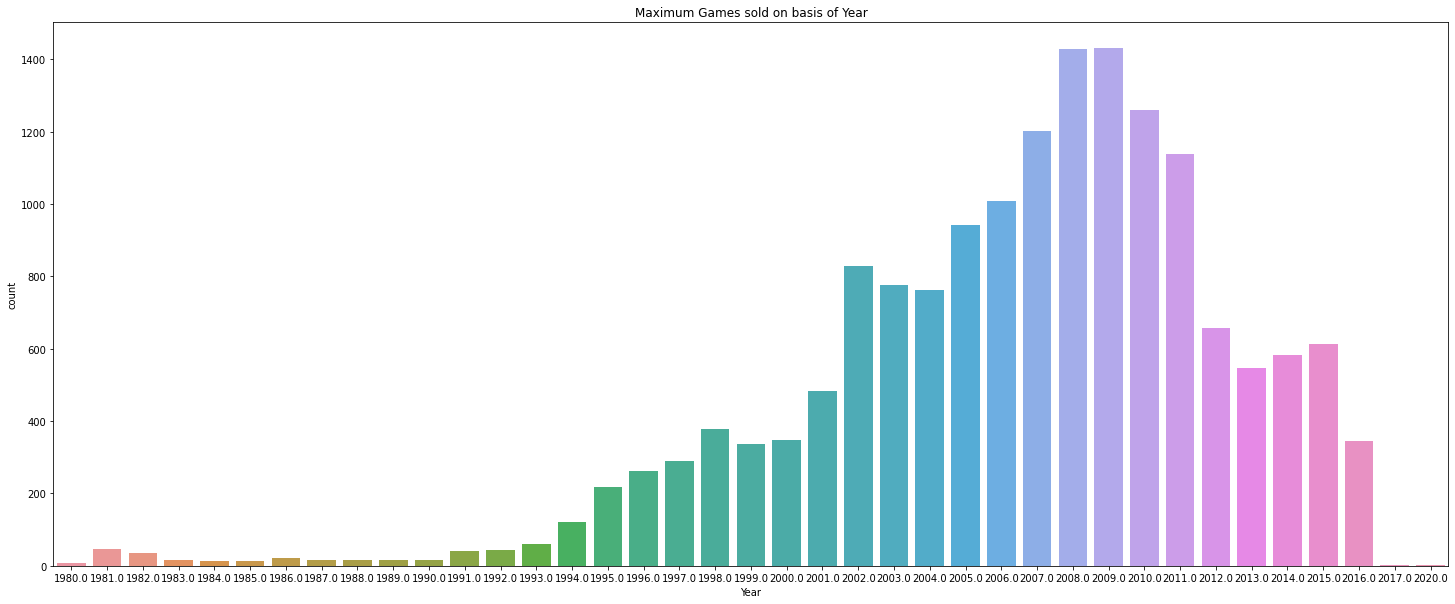

In [34]:
plt.figure(figsize=(25,10))
sns.countplot('Year',data=df)
plt.title('Maximum Games sold on basis of Year')
plt.show()

## Top 10 Platforms, Genres, Publishers with Histogram plotting

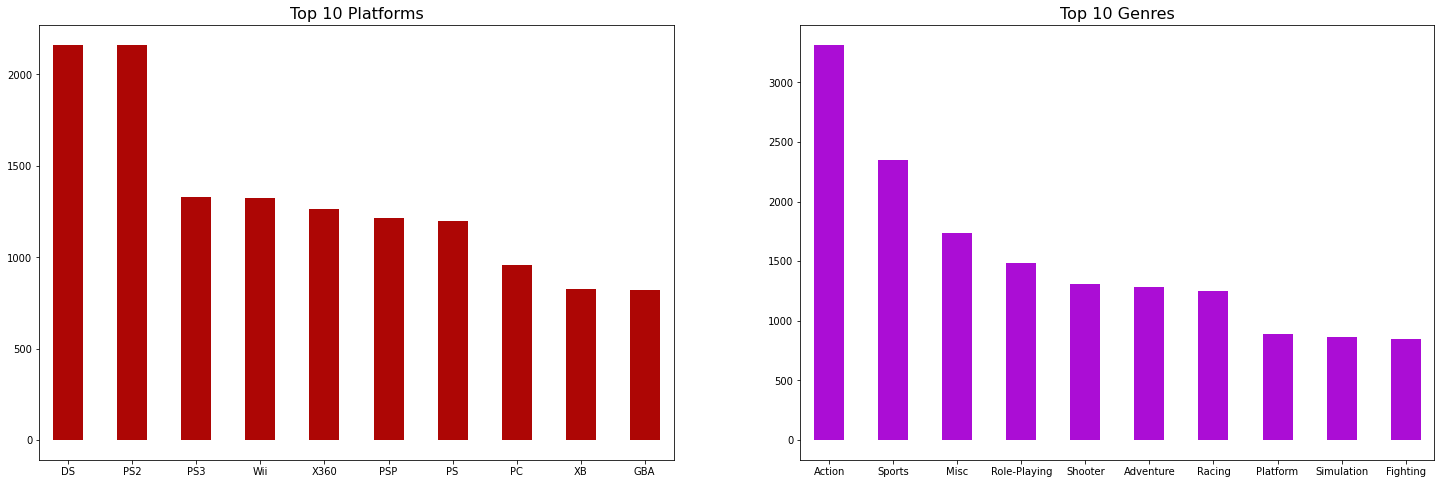

Text(0.5, 1.0, 'Top 10 Publishers')

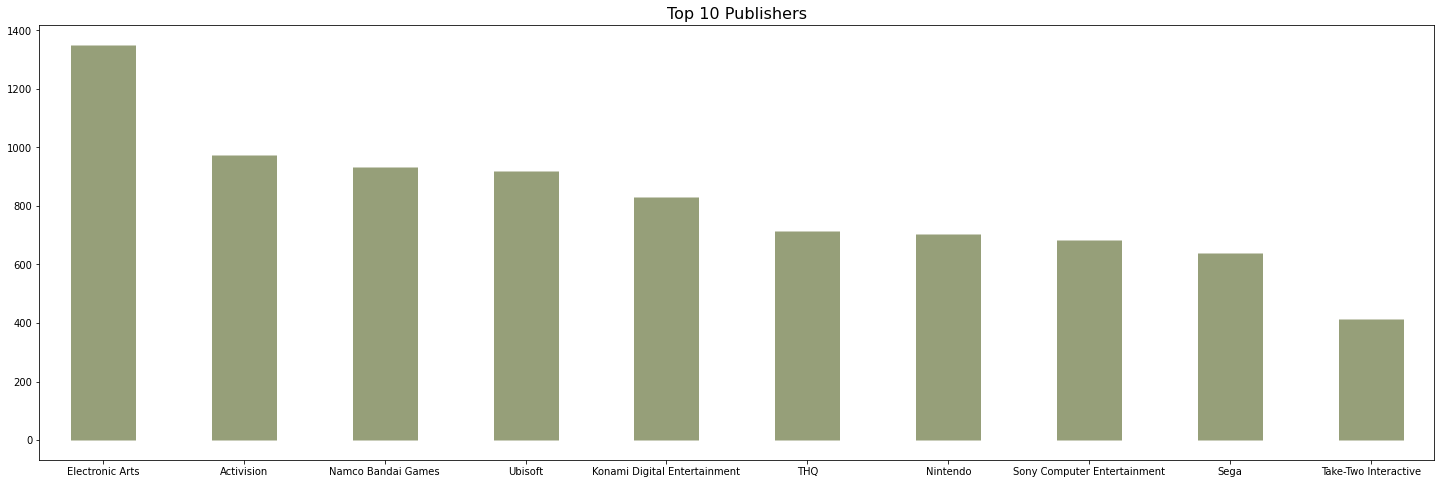

In [105]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = df.Platform.value_counts().head(10).index
topPlatforms_values = df.Platform.value_counts().head(10).values

#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = df.Genre.value_counts().head(10).index
topGenres_values = df.Genre.value_counts().head(10).values

#top game developers/publishers (name of the publisher,total number of games published by that publisher)
topPublisher_index = df.Publisher.value_counts().head(10).index
topPublisher_values = df.Publisher.value_counts().head(10).values

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8), facecolor='white')

##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=16)

#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(25,8), facecolor='white')

#top publishers of the games
ax.vlines(x=topPublisher_index, ymin=0, ymax=topPublisher_values, linewidth=65, color='#969F79')
ax.set_title('Top 10 Publishers',fontsize=16)

**Conclution for above Bar Graph are :**

* DS and PS2 are the most popular platforms in comparison to others platform.
* Action is the most popular genre and the second most is the sports
* Electronic Arts has published 1300+ products

## Corellating the Games Sales among Countries and Global with Seaborn

Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:

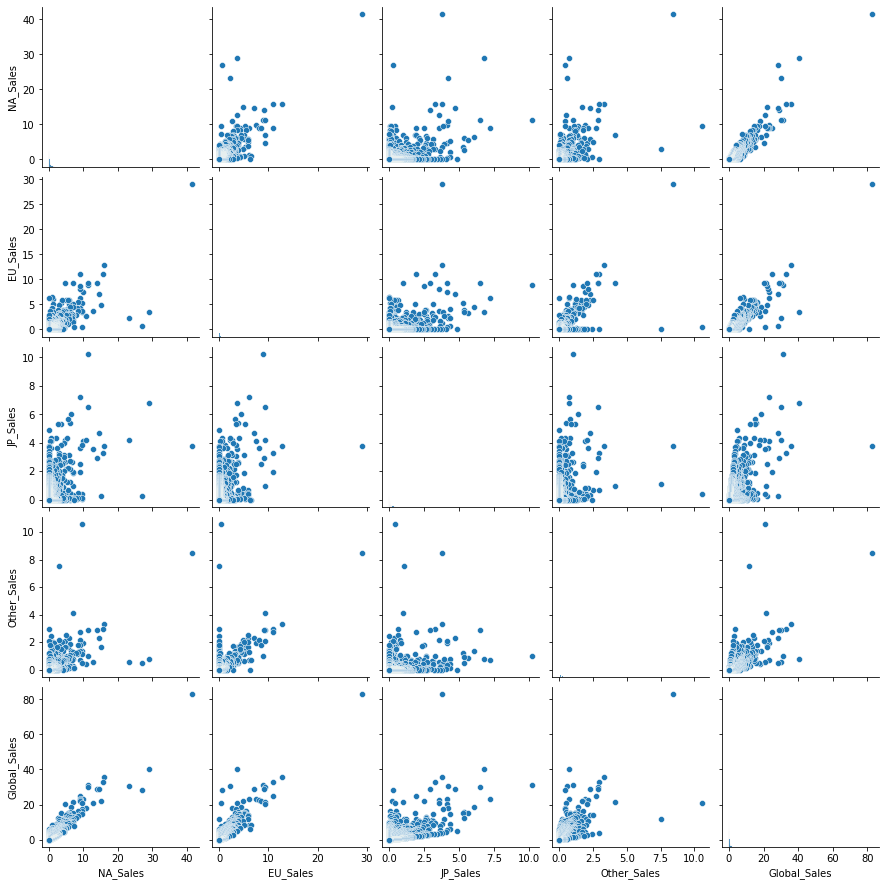

In [106]:
# Corellating among all Continents/Countries using Seaborn to perform pairplot and to plot the graph with matplotlib:
sns.pairplot(df.loc[0:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])
plt.show()

**Conclution Upon performing the correlation among various countries :**
* North America is the major market as the Global sales are highly correlated with it.
* Europe is also an important region.
* One intresting thing is Japanies sales are not correlated with any region's sales,We can assume that JAPANIES people have different taste, when it's about games.

## TOP 15 GAMES IN OTHER USING BAR CHART (HORIZONTALLY)

In [43]:
top15 = df[0:15]
top15

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


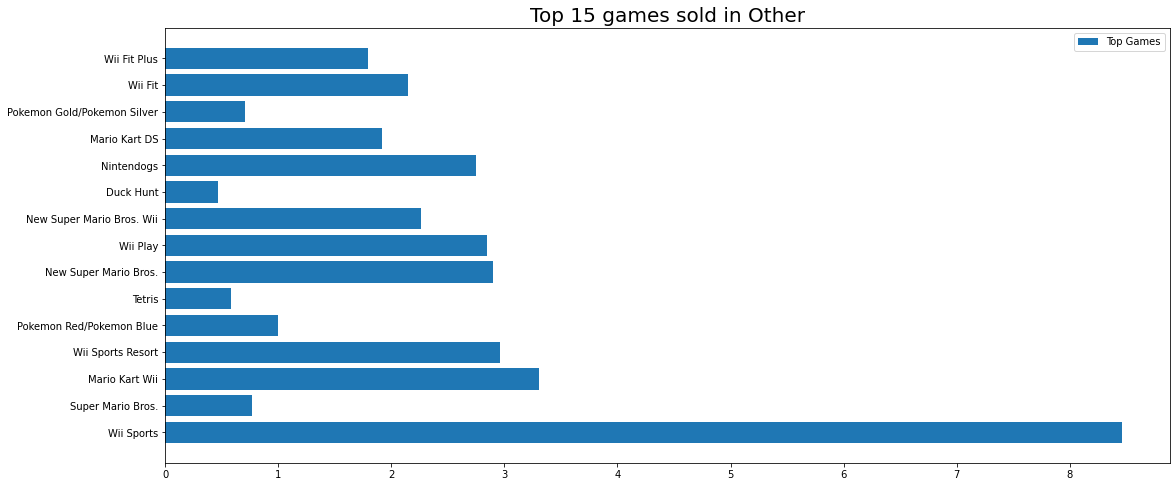

In [44]:
plt.figure(figsize = (18,8))
plt.barh(top15["Name"],top15["Other_Sales"], label = 'Top Games')
plt.title("Top 15 games sold in Other",fontdict = {"fontsize":20})
plt.savefig("Top 15 games soldm in Other.jpg",dpi = 300) #And to save it as an Jpeg image in the Directory
plt.legend()
plt.show()

In [47]:
Publisher = list(df.Publisher.unique())
global_sale_of_every_Publisher = pd.Series(dtype = float)
for pub in Publisher :
    data = df.loc[df.Publisher == pub]
    global_sale = sum(data.Global_Sales)
    global_sale_of_every_Publisher[pub] = global_sale

top_10 = global_sale_of_every_Publisher[:10]

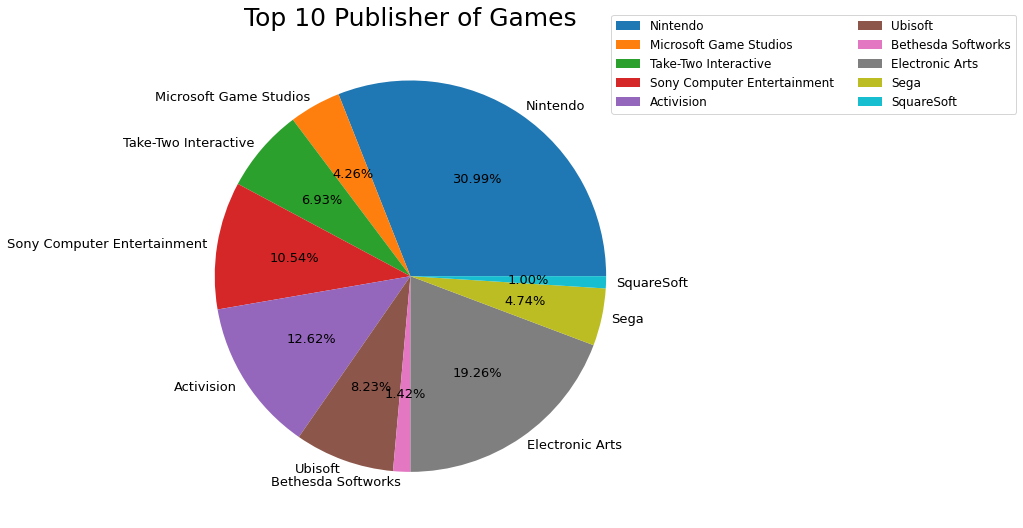

In [48]:
plt.figure(figsize = (10.5,9))
plt.pie(top_10,labels = top_10.index,autopct = "%.2f%%",textprops = {"fontsize":13},labeldistance = 1.05)
plt.legend(loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.82), ncol = 2)
plt.title("Top 10 Publisher of Games",fontdict = {"fontsize":25,"fontweight":100})
plt.savefig("Top 10 Publisher of Games",dpi = 200)
plt.show()

## Percentage of Each Genre of Games 

In [49]:
Genre = df.Genre
Genre = Genre.value_counts()

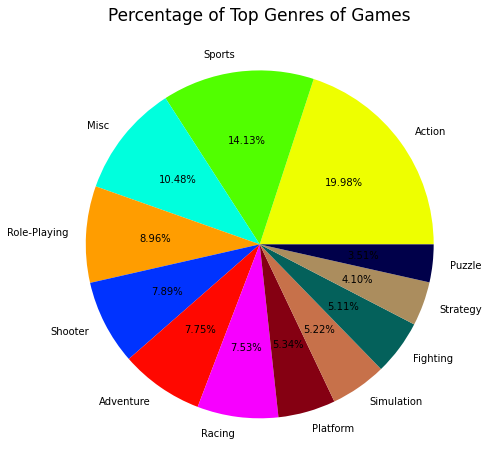

In [50]:
plt.figure(figsize = (8,8))
labels = Genre.index
colors = ["#eeff00","#51ff00","#00ffdd","#ff9d00","#0033ff","#ff0800","#f700ff","#850012","#c7714a","#04615b","#ab8d5e","#00004a"]
plt.pie(Genre,labels = labels,colors = colors,autopct = "%.2f%%") 
plt.title("Percentage of Top Genres of Games",fontdict = {"fontsize":17})
plt.savefig("Top Genres Chart",dpi = 200)
plt.show()

## Best Selling Games in  Countries

Text(0.5, 1.0, 'Best selling games in Other Countries')

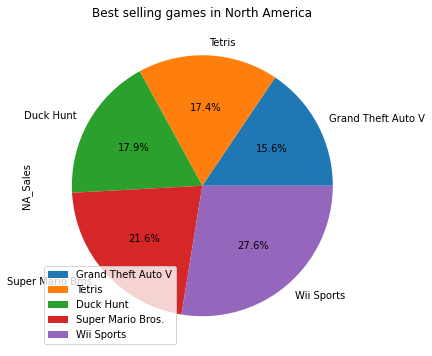

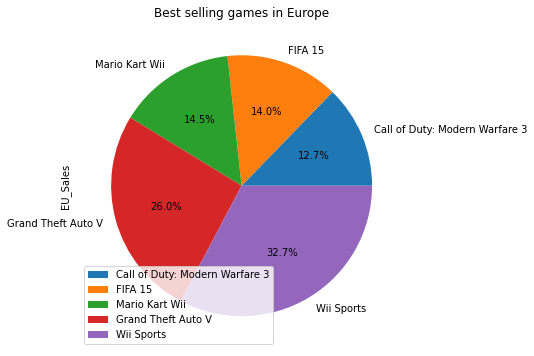

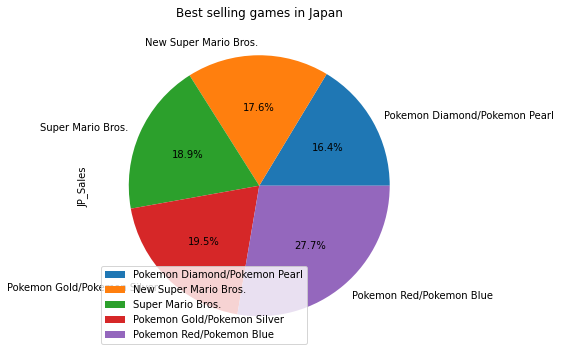

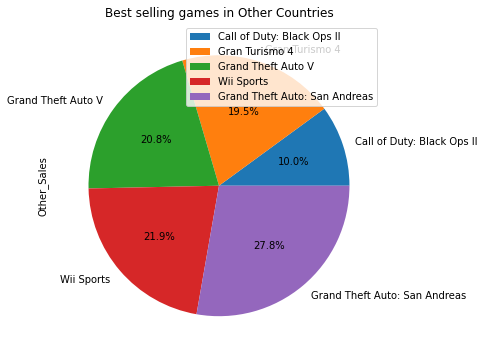

In [53]:
#Pie Plot

# For North America
df1 = pd.DataFrame(df.groupby('Name')['NA_Sales'].sum())
df1.sort_values(by=['NA_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='NA_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in North America")

# For Europe Sales
df1 = pd.DataFrame(df.groupby('Name')['EU_Sales'].sum())
df1.sort_values(by=['EU_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='EU_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Europe")

# For Japan Sales
df1 = pd.DataFrame(df.groupby('Name')['JP_Sales'].sum())
df1.sort_values(by=['JP_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='JP_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Japan")

# For India Sales
df1 = pd.DataFrame(df.groupby('Name')['Other_Sales'].sum())
df1.sort_values(by=['Other_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='Other_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Other Countries")

## Video Game Sale Based on Genre (Global vs. OTHER)

In [55]:
df_genre = df.groupby('Genre')
def genreBased(region):
    xrange = np.arange(1,len(df_genre.sum())+1)
    fig,ax= plt.subplots(ncols=2,figsize=(18,6))
    df_to_plot = df_genre.sum().sort_values(by=region,ascending =False)[::-1]
    df_to_plot[region].plot(kind='barh')
    plt.title(region)
    #labels
    ax[1].set_ylabel(None)
    ax[1].tick_params(axis='both', which='major', labelsize=13)
    ax[1].set_xlabel('Total Sales(in millions)', fontsize=15,labelpad=21)
    #spines
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].grid(False)
    
    #annotations    
    for x,y in zip(np.arange(len(df_genre.sum())+1),df_genre.sum().sort_values(by=region,ascending =False)[::-1][region]):
        label = "{:}".format(y)
        labelr = round(y,2)
        plt.annotate(labelr, # this is the text
                     (y,x), # this is the point to label
                      textcoords="offset points",# how to position the text
                     xytext=(6,0), # distance from text to points (x,y)
                    ha='left',va="center")
     
    #donut chart
    theme = plt.get_cmap('Blues')
    ax[0].set_prop_cycle("color", [theme(1. * i / len(df_to_plot))for i in range(len(df_to_plot))])    
    wedges, texts,_ = ax[0].pie(df_to_plot[region], wedgeprops=dict(width=0.45), startangle=-45,labels=df_to_plot.index,
                      autopct="%.1f%%",textprops={'fontsize': 13,})

 
    plt.tight_layout()    

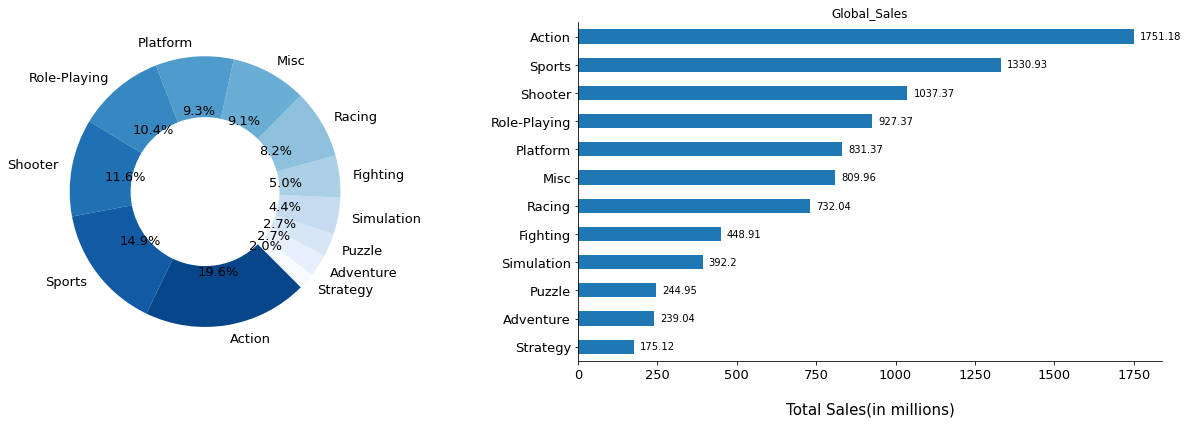

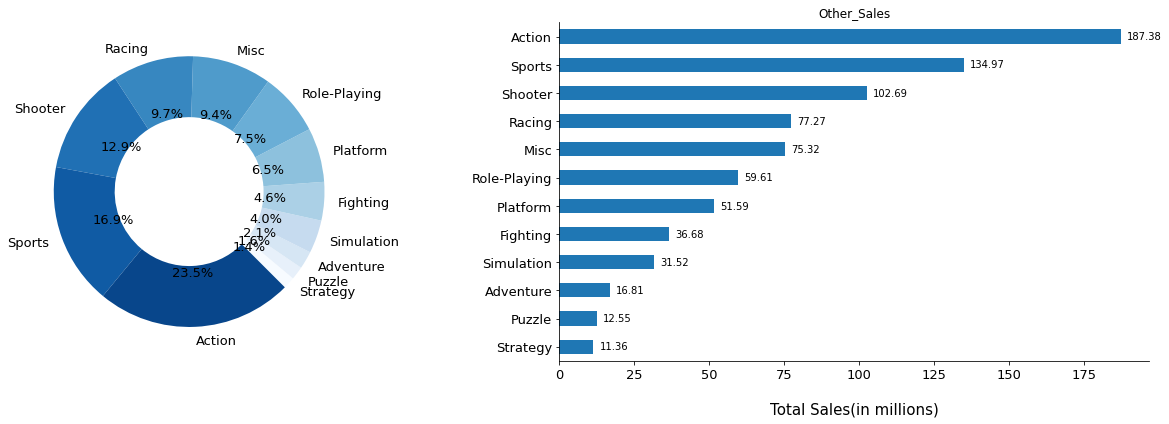

In [56]:
genreBased('Global_Sales') #ABOVE
genreBased('Other_Sales') #BELOW

## Video Game sale from 1985 to 2017 (Year Basis)

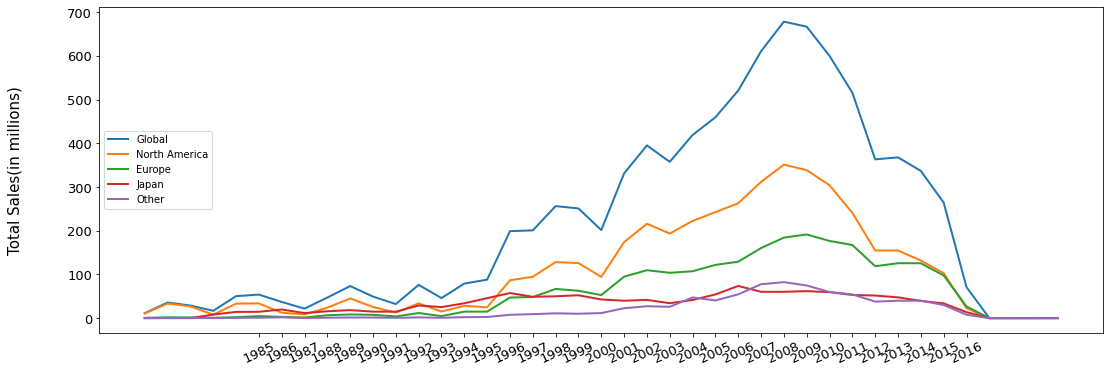

In [59]:
df_year = df.groupby('Year').sum().sort_values(by=['Year'],ascending = False)

fig,cc = plt.subplots(figsize=(18,6))
cc.plot(df_year.index,df_year['Global_Sales'],label ='Global',linewidth=2)
cc.plot(df_year.index,df_year['NA_Sales'],label ='North America',linewidth=2)
cc.plot(df_year.index,df_year['EU_Sales'],label ='Europe',linewidth=2)
cc.plot(df_year.index,df_year['JP_Sales'],label ='Japan',linewidth=2)
cc.plot(df_year.index,df_year['Other_Sales'],label ='Other',linewidth=2)

cc.legend(loc="center left")

cc.set_ylabel('Total Sales(in millions)', fontsize=15,labelpad=45)
cc.set_xticks(np.arange(1985,2017,1))

cc.tick_params(axis='both', which='major', labelsize=13)
cc.grid(False)

for item in cc.get_xticklabels():
    item.set_rotation(25)

#### Observations Based on above linear Graph (with subplots)
* As seen in the graph above video-game sales peaked in <b>2008-2010</b> across the globe.
* But the overall sales of <b>Japan</b> has remained consistent nontheless.   

## Displaying the trend of Analysis using Seaborn's Scatterplot and Distplot method

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Scatterplot view of Global vs. Other Sales')

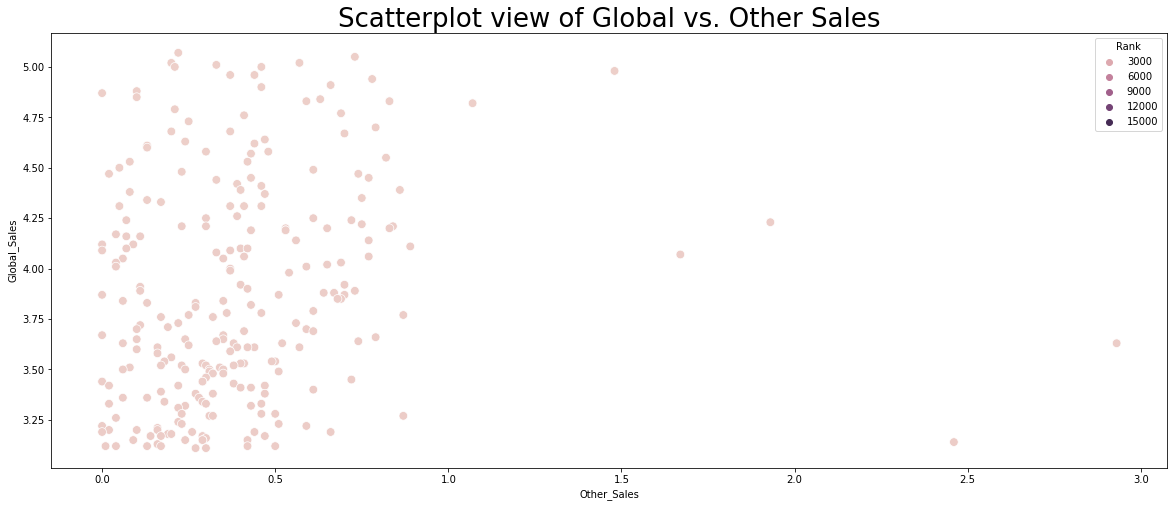

In [63]:
#Scatterplot Method
plt.figure(figsize=(20,8))
sns.scatterplot(df.Other_Sales[200:450], # X-axis taken in range from 200 to 450
                df.Global_Sales[200:450],  # Y-axis taken in range from 200 to 450
                hue=df.Rank,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. Other Sales", fontdict={'fontsize':26})

#Xlabel and Ylabel are in millions

### Histograms and KDE can be combined using distplot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

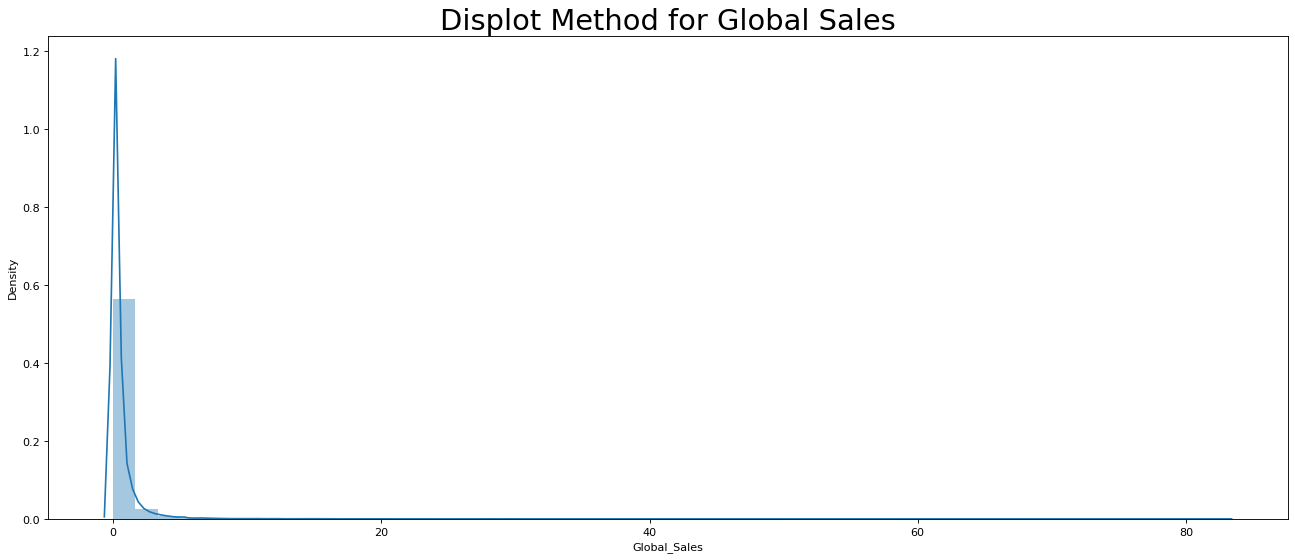

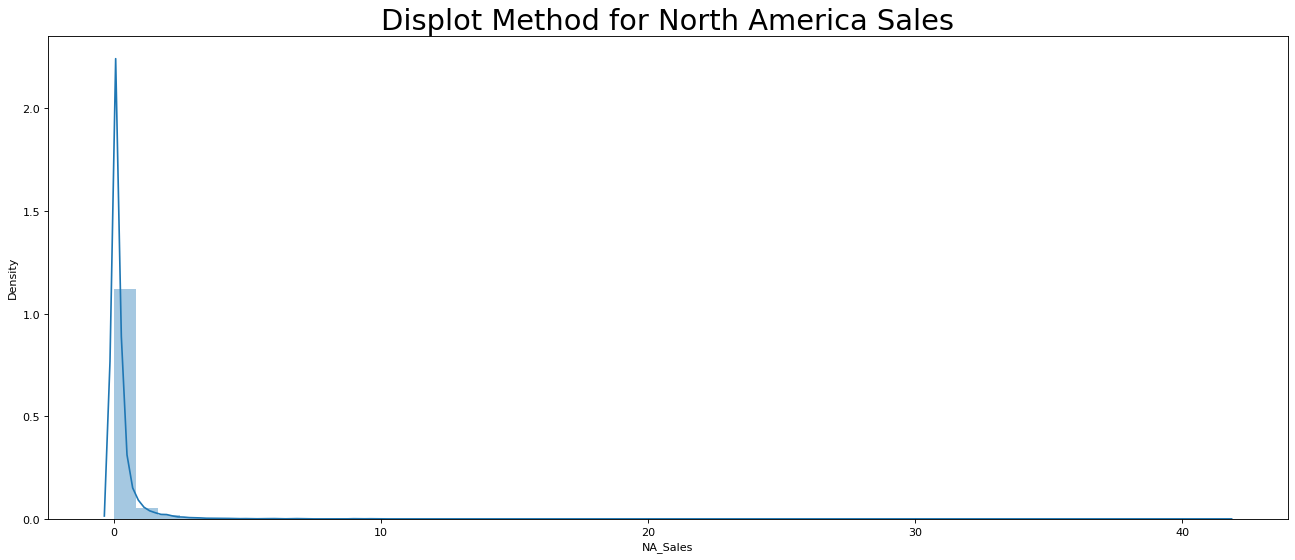

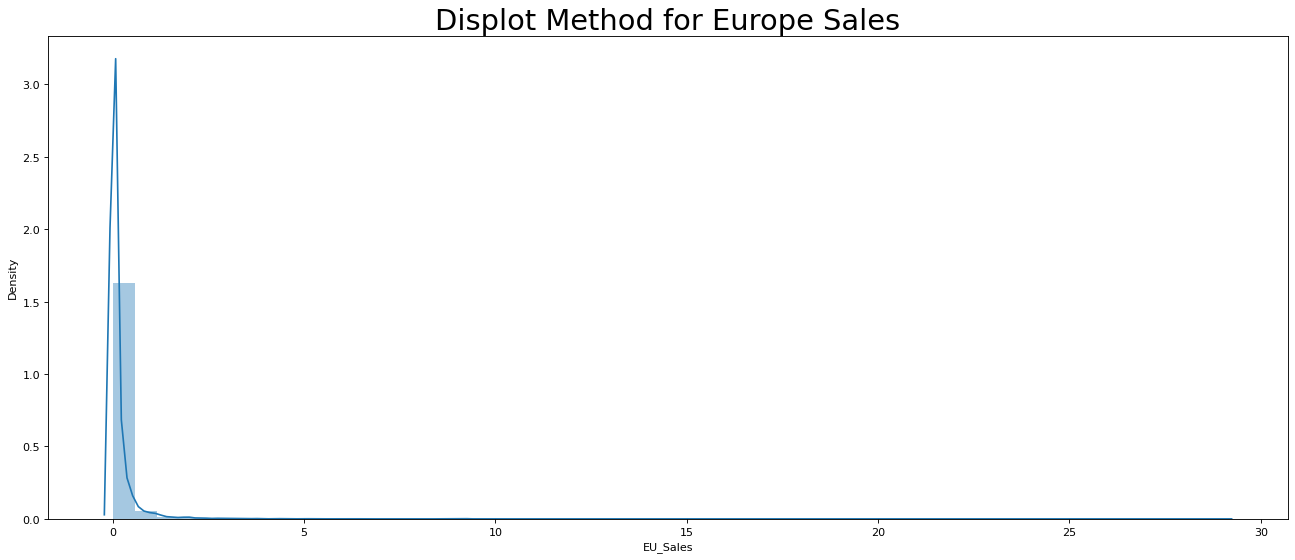

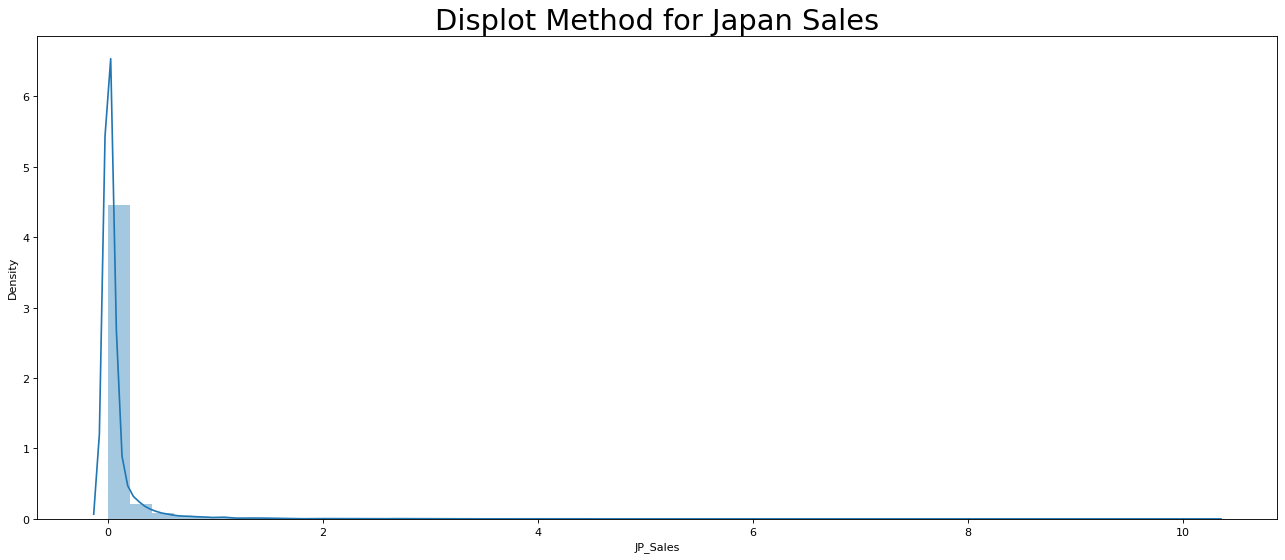

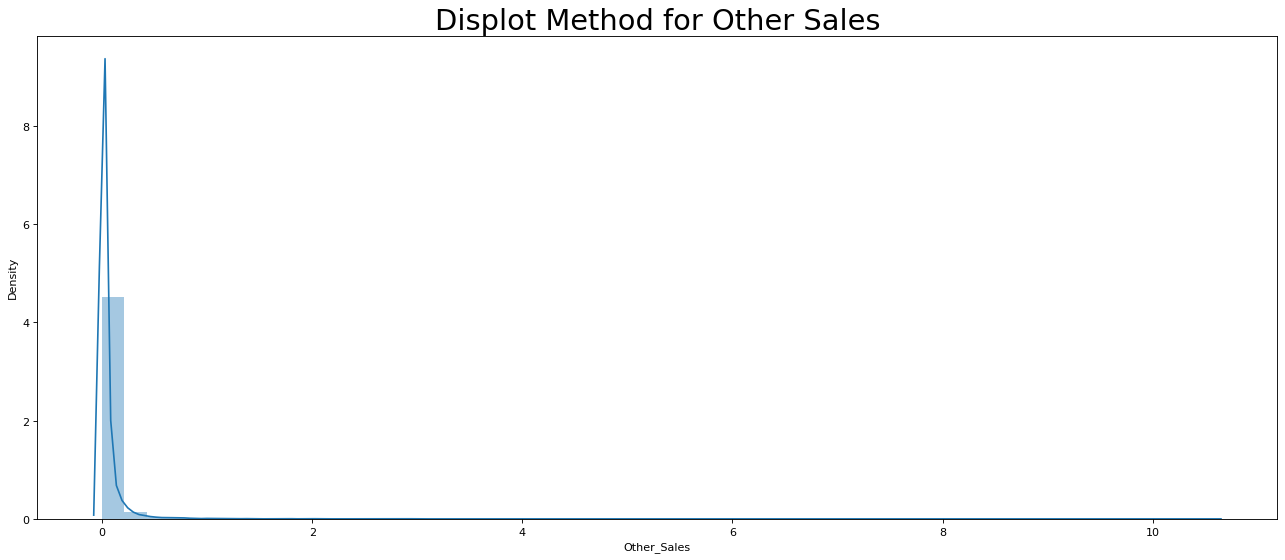

In [64]:
#Displot Method

df_name = ['Global','North America', 'Europe', 'Japan','Other']
j = 0
df_lst = [df.Global_Sales,
          df.NA_Sales,
          df.EU_Sales,
          df.JP_Sales,
          df.Other_Sales]

for i in df_lst:
    plt.figure(figsize=(20,8), dpi= 80)
    sns.distplot(i)
    plt.title('Displot Method for '+str(df_name[j])+' Sales', fontdict={'fontsize':26})
    j += 1

## Heatmap view of Games

Text(111.36111111111111, 0.5, 'Total count of Publishing in Mean')

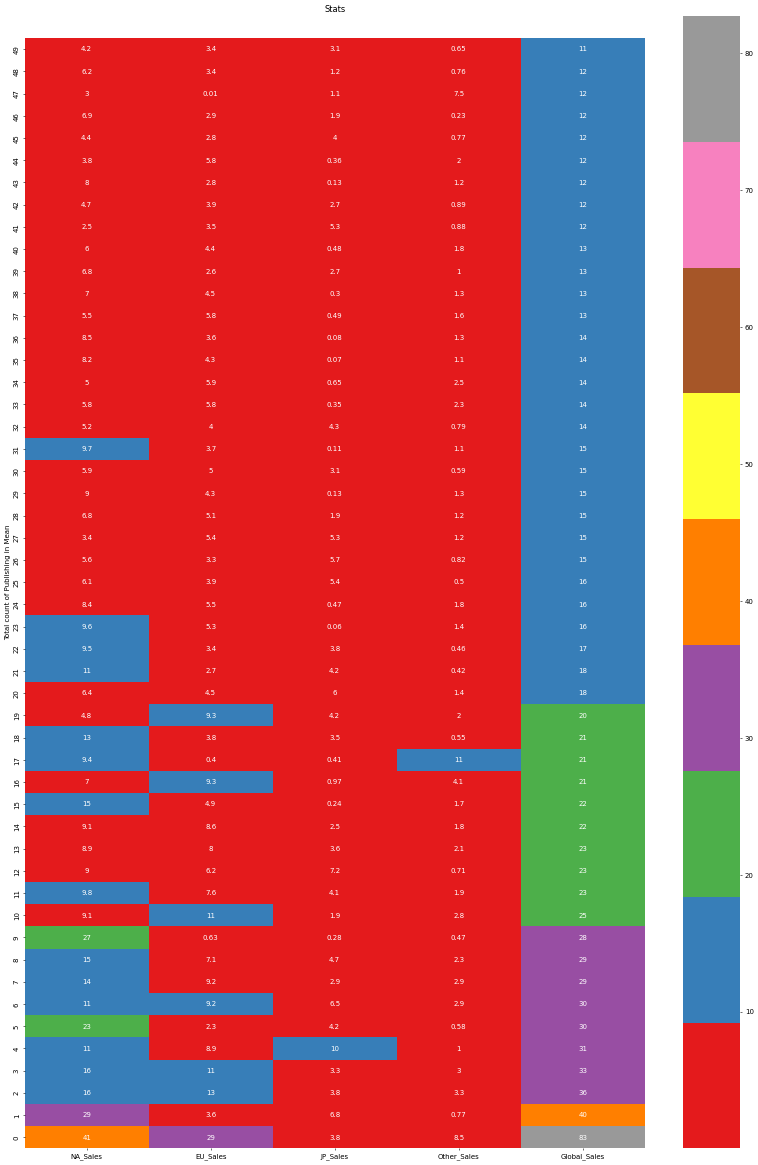

In [65]:
plt.figure(figsize=(20,30), dpi= 50)
avg_stats = df.groupby('Publisher').mean()
gamesample = df.filter(like = 'Sales')[0:50]  
plt.title("Stats")
sns.heatmap(gamesample, annot=True, cmap='Set1')
plt.ylim(0,51)
plt.ylabel('Total count of Publishing in Mean')

<AxesSubplot:>

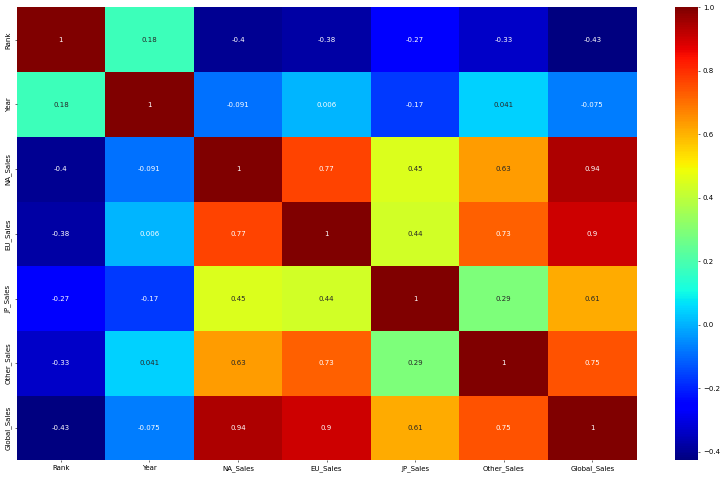

In [66]:
# Games sold based on all Columns

plt.figure(figsize=(20,12), dpi= 50)
#sold = sns.load_dataset(.corr())
sns.heatmap(df.corr('pearson'),annot=True, cmap = 'jet')

## Swarmplot with Sample color palette 

In [68]:
#Few Randomly Selected Colors in HEX format

mycolors = ['#78C850',  # Grass
            '#F08030',  # Fire
            '#6890F0',  # Water
            '#A8B820',  # Bug
            '#A8A878',  # Normal
            '#A040A0',  # Poison
            '#F8D030',  # Electric
            '#E0C068',  # Ground
            '#EE99AC',  # Fairy
            '#C03028',  # Fighting
            '#F85888',  # Psychic
            '#B8A038',  # Rock
            '#705898',  # Ghost
            '#98D8D8',  # Ice
            '#7038F8',  # Dragon
           ]

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.p

Text(0.5, 1.0, 'Swarmplotting implementation for Year vs. Publisher')

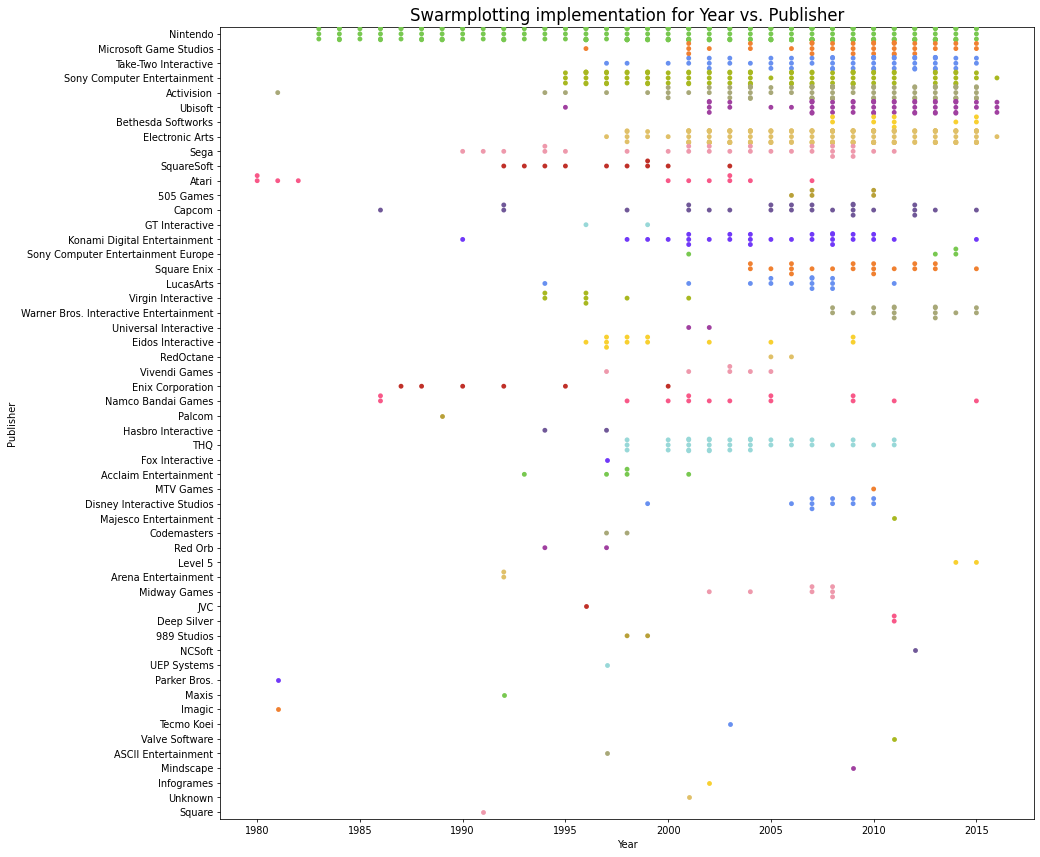

In [145]:
plt.figure(figsize=(15,15), dpi= 70)
sns.swarmplot(x='Year',
              y='Publisher',
              data=df[0:1000],
              palette=mycolors)
plt.title('Swarmplotting implementation for Year vs. Publisher', fontdict = {"fontsize":17})

## Trend of Publisher with maximum Games sold using Seaborn's Swarmplot

Text(0.5, 1.0, 'Trend of Publisher that how much games have been sold')

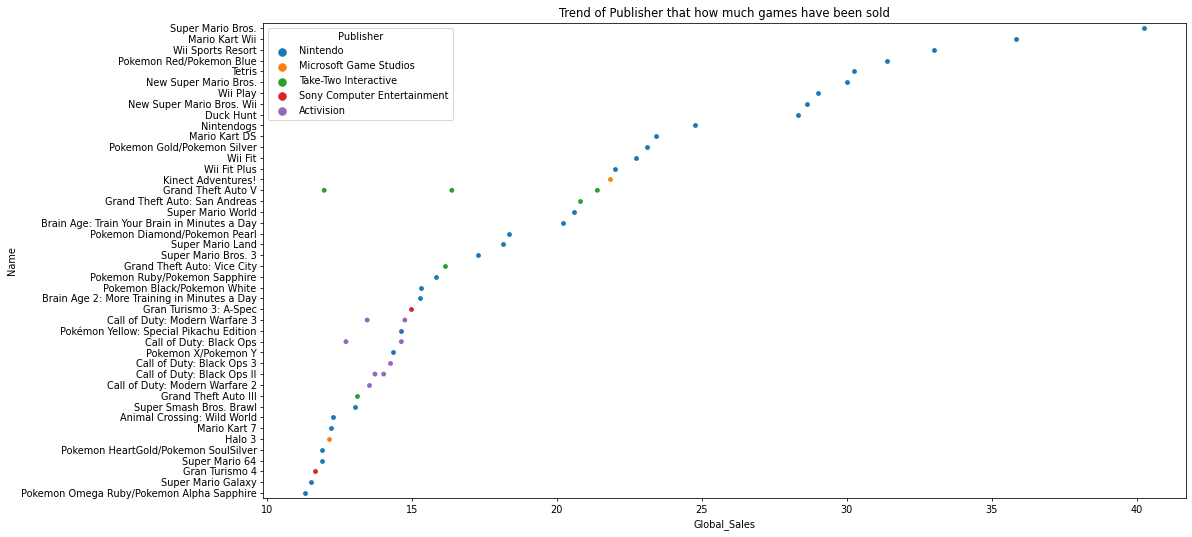

In [73]:
plt.figure(figsize=(17,9), dpi= 70)
sns.swarmplot(x='Global_Sales',
              y='Name',
              data=df[1:50], #Ranged from 1 to 50 
              hue='Publisher')
plt.title('Trend of Publisher that how much games have been sold')

# <center>Asking and Answering Questions</center>

### Q1.  How many games have been sold between 2001 and 2010 in Millions of all Countries and Globally ?

In [76]:
print('''Calculate total amount in millions, ranges from 2001 to 2010 and round it to Integer using round() function.''')
year_count = [i for i in range(2001, 2011)]
count_in_range = df.loc[df['Year'].isin(year_count)]

ns = sum(count_in_range.NA_Sales) #Total sales in North America
print('\nTotal Expenditure in North America from 2001 to 2010 is',round(ns),'Millions')

es = sum(count_in_range.EU_Sales) #Total sales in Europe
print('Total Expenditure in Europe from 2001 to 2010 is',round(es),'Millions')

js = sum(count_in_range.JP_Sales) #Total sales in Japan
print('Total Expenditure in Japan from 2001 to 2010 is',round(js),'Millions')

ins = sum(count_in_range.Other_Sales) #Sales in India
print('Total Expenditure in India from 2001 to 2010 is',round(ins),'Millions')

gs = sum(count_in_range.Global_Sales) #Global Sales
print('\nTotal Expenditure from Globally from 2001 to 2010 is',round(gs),'Millions')

Calculate total amount in millions, ranges from 2001 to 2010 and round it to Integer using round() function.

Total Expenditure in North America from 2001 to 2010 is 2619 Millions
Total Expenditure in Europe from 2001 to 2010 is 1380 Millions
Total Expenditure in Japan from 2001 to 2010 is 527 Millions
Total Expenditure in India from 2001 to 2010 is 513 Millions

Total Expenditure from Globally from 2001 to 2010 is 5043 Millions


### Q2. How to Plot using pointplot between the range of Year 2003 and 2010 ?

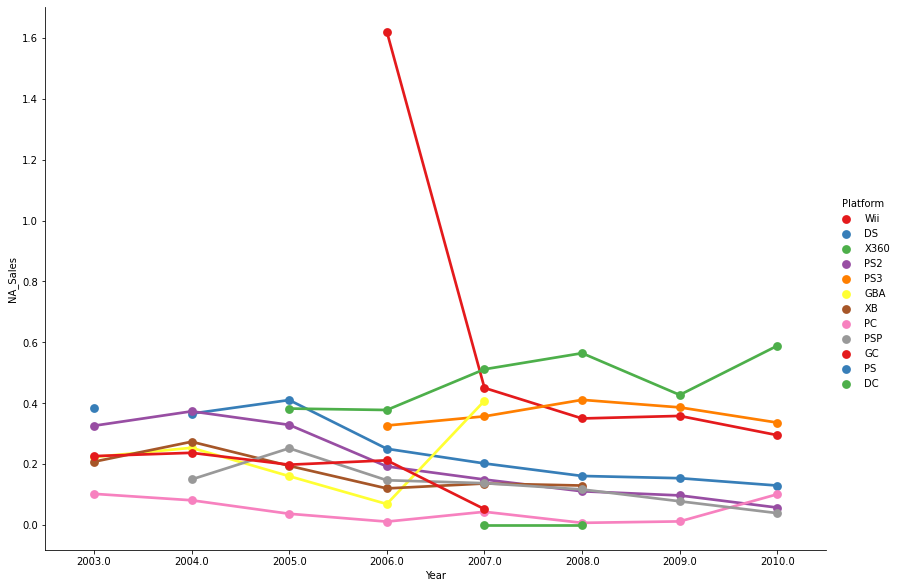

In [77]:
#2003-2010
first_filter = df.Year>2002
second_filter = df.Year<2011
newdata = df[first_filter&second_filter]

#visualization
sns.catplot(x="Year",y="NA_Sales",kind="point",
            data=newdata,
            hue = "Platform",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8.27, 
            aspect=11.7/8.27)
plt.show()

### Q3. Create the Dataframe for Platforms and Publishers have been in top in maximum counts , sort it accordingly ?

In [79]:
top_platform = df.Platform.value_counts().head(15)
top_publisher = df.Publisher.value_counts().head(15)

#Top Platforms are Under 15
top_platform.to_frame()

,Platform
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824
GBA,822


In [80]:
#Top Publishers are under 15
top_publisher.to_frame()

,Publisher
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639
Take-Two Interactive,413


### Q4. How to create a new dataframe with column name 'Name Of Game Which are Unique' and display all Unique Games and in which index starts from 1  ?

In [81]:

uni_array = df.Name.unique()
ind = [i for i in range(1,len(uni_array)+1)]

ddff = pd.DataFrame(data = uni_array,  
                  index = ind,  
                  columns = ['Name Of Game Which are Unique'])
ddff

,Name Of Game Which are Unique
1,Wii Sports
2,Super Mario Bros.
3,Mario Kart Wii
4,Wii Sports Resort
5,Pokemon Red/Pokemon Blue
...,...
11489,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...
11490,Eiyuu Densetsu: Sora no Kiseki Material Collec...
11491,Plushees
11492,Woody Woodpecker in Crazy Castle 5


### Q5. How to aggregate the mean, minimum, maximum of games based on Publisher For Global Sales Column ?

In [82]:
aggr_result = df.groupby('Publisher').agg({'Global_Sales': ['mean', 'min', 'max']})
aggr_result

Global_Sales            
                                     mean   min   max
Publisher                                            
10TACLE Studios                  0.036667  0.02  0.06
1C Company                       0.033333  0.01  0.05
20th Century Fox Video Games     0.388000  0.22  0.79
2D Boy                           0.040000  0.04  0.04
3DO                              0.281111  0.01  1.28
...                                   ...   ...   ...
id Software                      0.030000  0.03  0.03
imageepoch Inc.                  0.020000  0.01  0.03
inXile Entertainment             0.100000  0.10  0.10
mixi, Inc                        0.860000  0.86  0.86
responDESIGN                     0.065000  0.04  0.09

[578 rows x 3 columns]

# <center>Inferences and Conclusion</center>
 
 The dataset contains immense possibilities to improve Analytical study and research values and have a positive impact. It is not limited to the problem taken into consideration for this project. Many other interesting possibilities can be explored using this dataset.

The ways in which questions can be asked varies, so does the way of tackling a problem. Only the one that has been minutely observed and tested will provide results worth trusting.

The plots which have been built in this project can be used in Various Analysis fields like educational, business related, Technical and Many other fields.

Thanks for Studying my Project.

### <i>Thanks for <a href='https://jovian.ml'>Jovian.ml</a> Team</i>